## Performing Analysis of Meteorological Data
The Null Hypothesis is "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming"

In [1]:
# Data Cleaning
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

In [2]:
# Reading data
df=pd.read_csv('weatherHistory.csv')

# Creating a dataframe with the three required columns
columns=['Formatted Date','Apparent Temperature (C)','Humidity']
req_df=df[columns].copy()

# Splitting the formatted date into three separate columns 
req_df[['Date','Time','Excess']]=req_df['Formatted Date'].str.split(expand=True)

#Dropping unnecessary columns
req_df=req_df.drop(['Formatted Date','Excess'],axis=1)
req_df.head()

,Apparent Temperature (C),Humidity,Date,Time
0,7.388889,0.89,2006-04-01,00:00:00.000
1,7.227778,0.86,2006-04-01,01:00:00.000
2,9.377778,0.89,2006-04-01,02:00:00.000
3,5.944444,0.83,2006-04-01,03:00:00.000
4,6.977778,0.83,2006-04-01,04:00:00.000


In [3]:
# Converting hourly records to daily records
req_df=req_df.groupby('Date').mean()

# Setting the index to original
index=req_df.index
req_df=req_df.reset_index()

# Restoring Date column
req_df['Date']=index
req_df.head(20)

,Date,Apparent Temperature (C),Humidity
0,2006-01-01,-0.447222,0.818333
1,2006-01-02,2.042593,0.844583
2,2006-01-03,0.223843,0.898333
3,2006-01-04,-0.457407,0.905417
4,2006-01-05,0.256481,0.948333
5,2006-01-06,1.264120,0.947083
6,2006-01-07,-0.705556,0.935833
7,2006-01-08,-2.481481,0.868750
8,2006-01-09,-3.115278,0.797083
9,2006-01-10,-0.690509,0.811667


In [4]:
# Splitting date to three separate columns 
req_df[['Year','Month','Day']]=req_df['Date'].str.split("-",expand=True)

# Grouping by Month and Year to find average 
mean_df=req_df.groupby(['Month','Year'],as_index=False).mean()
print(mean_df)

    Month  Year  Apparent Temperature (C)  Humidity
0      01  2006                 -4.170818  0.834651
1      01  2007                  2.386044  0.813589
2      01  2008                 -2.075724  0.819570
3      01  2009                 -3.677360  0.867581
4      01  2010                 -4.308296  0.875981
..    ...   ...                       ...       ...
127    12  2012                 -3.663053  0.886707
128    12  2013                 -0.688389  0.824059
129    12  2014                  0.577210  0.836062
130    12  2015                  0.846610  0.925538
131    12  2016                 -2.016263  0.888051

[132 rows x 4 columns]


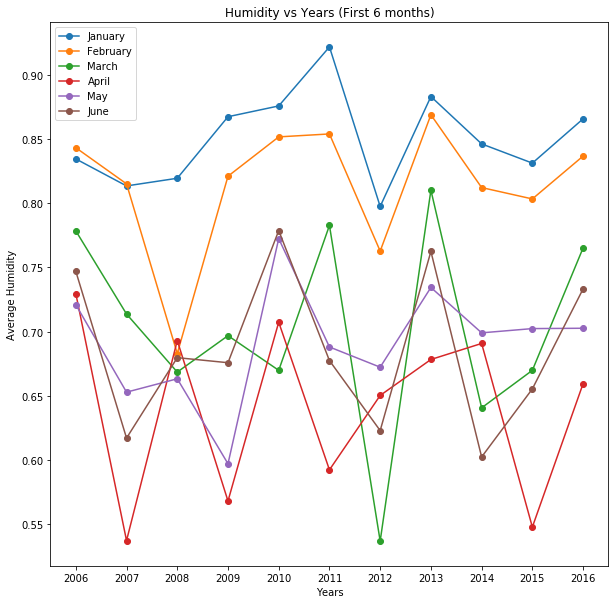

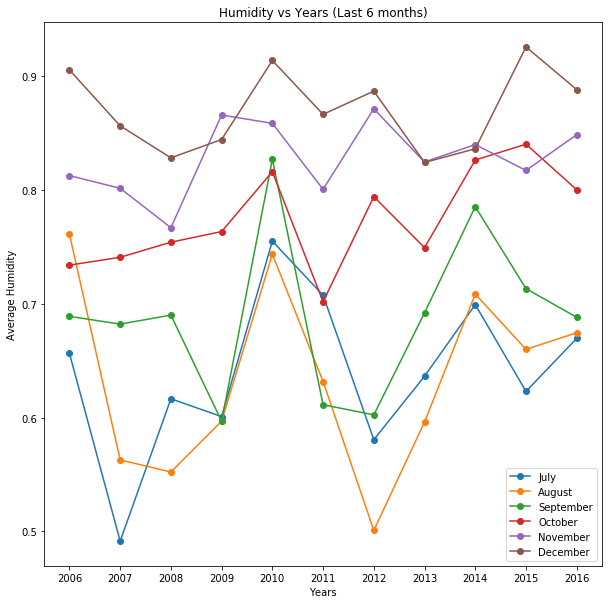

In [5]:
plt.rcParams["figure.figsize"]= 10,10

# Fetching data of each month
Jan=mean_df[mean_df['Month']=='01']['Humidity']
Feb=mean_df[mean_df['Month']=='02']['Humidity']
March=mean_df[mean_df['Month']=='03']['Humidity']
April=mean_df[mean_df['Month']=='04']['Humidity']
May=mean_df[mean_df['Month']=='05']['Humidity']
June=mean_df[mean_df['Month']=='06']['Humidity']

# Fetching data for x axis
x=mean_df[mean_df['Month']=='01']['Year']

# Plotting data 
plt.plot(x,Jan,label = "January",marker='o') 
plt.plot(x,Feb,label='February',marker='o') 
plt.plot(x,March,label='March',marker='o') 
plt.plot(x,April,label='April',marker='o')
plt.plot(x,May,label='May',marker='o') 
plt.plot(x,June,label='June',marker='o') 

# Naming the x axis 
plt.xlabel('Years') 
# Naming the y axis 
plt.ylabel('Average Humidity') 
  
# Giving a title to my graph 
plt.title("Humidity vs Years (First 6 months)")
plt.legend() 
# Function to show the plot 
plt.show() 
plt.close()

# Fetching data of each month
July=mean_df[mean_df['Month']=='07']['Humidity']
August=mean_df[mean_df['Month']=='08']['Humidity']
Sept=mean_df[mean_df['Month']=='09']['Humidity']
Oct=mean_df[mean_df['Month']=='10']['Humidity']
Nov=mean_df[mean_df['Month']=='11']['Humidity']
Dec=mean_df[mean_df['Month']=='12']['Humidity']

# Fetching data for x axis
x=mean_df[mean_df['Month']=='01']['Year']

plt.plot(x,July,label = "July",marker='o') 
plt.plot(x,August,label='August',marker='o') 
plt.plot(x,Sept,label='September',marker='o') 
plt.plot(x,Oct,label='October',marker='o')
plt.plot(x,Nov,label='November',marker='o') 
plt.plot(x,Dec,label='December',marker='o') 

# Naming the x axis 
plt.xlabel('Years') 
# Naming the y axis 
plt.ylabel("Average Humidity")
  
# Giving a title to my graph 
plt.title("Humidity vs Years (Last 6 months)")
plt.legend() 
# Function to show the plot 
plt.show() 
plt.close()


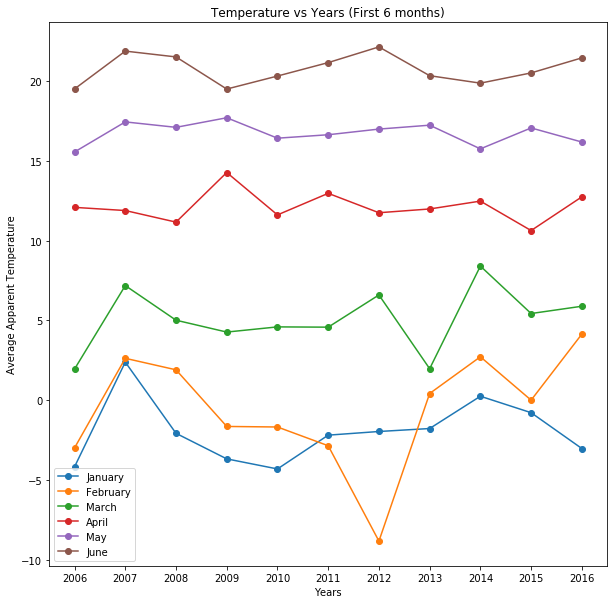

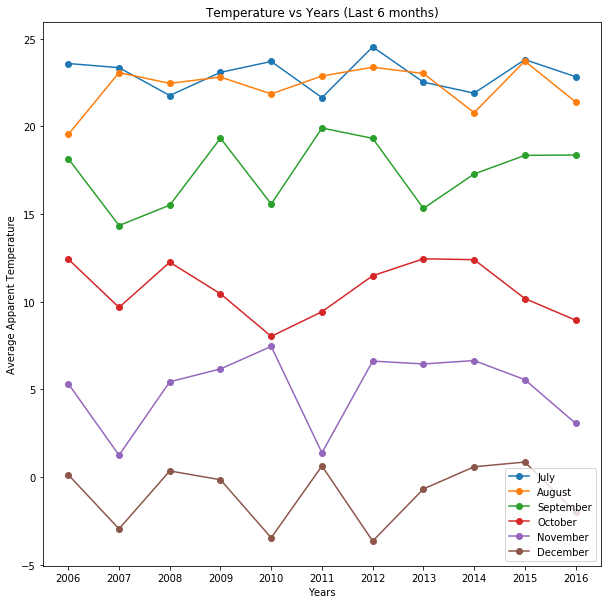

In [6]:
plt.rcParams["figure.figsize"]=10,10

# Fetching data of each month
Jan=mean_df[mean_df['Month']=='01']['Apparent Temperature (C)']
Feb=mean_df[mean_df['Month']=='02']['Apparent Temperature (C)']
March=mean_df[mean_df['Month']=='03']['Apparent Temperature (C)']
April=mean_df[mean_df['Month']=='04']['Apparent Temperature (C)']
May=mean_df[mean_df['Month']=='05']['Apparent Temperature (C)']
June=mean_df[mean_df['Month']=='06']['Apparent Temperature (C)']

# Fetching data for x axis
x=mean_df[mean_df['Month']=='01']['Year']

plt.plot(x,Jan,label = "January",marker='o') 
plt.plot(x,Feb,label='February',marker='o') 
plt.plot(x,March,label='March',marker='o') 
plt.plot(x,April,label='April',marker='o')
plt.plot(x,May,label='May',marker='o') 
plt.plot(x,June,label='June',marker='o') 

# Naming the x axis 
plt.xlabel('Years') 
# Naming the y axis 
plt.ylabel('Average Apparent Temperature') 
  
# Giving a title to my graph 
plt.title('Temperature vs Years (First 6 months)') 
plt.legend() 
# Function to show the plot 
plt.show() 
plt.close()

# Fetching data of each month
July=mean_df[mean_df['Month']=='07']['Apparent Temperature (C)']
August=mean_df[mean_df['Month']=='08']['Apparent Temperature (C)']
Sept=mean_df[mean_df['Month']=='09']['Apparent Temperature (C)']
Oct=mean_df[mean_df['Month']=='10']['Apparent Temperature (C)']
Nov=mean_df[mean_df['Month']=='11']['Apparent Temperature (C)']
Dec=mean_df[mean_df['Month']=='12']['Apparent Temperature (C)']

# Fetching data for x axis
x=mean_df[mean_df['Month']=='01']['Year']

plt.plot(x,July,label = "July",marker='o') 
plt.plot(x,August,label='August',marker='o') 
plt.plot(x,Sept,label='September',marker='o') 
plt.plot(x,Oct,label='October',marker='o')
plt.plot(x,Nov,label='November',marker='o') 
plt.plot(x,Dec,label='December',marker='o') 

# Naming the x axis 
plt.xlabel('Years') 
# Naming the y axis 
plt.ylabel('Average Apparent Temperature') 
  
# Giving a title to my graph 
plt.title('Temperature vs Years (Last 6 months)') 
plt.legend(loc=4) 
# Function to show the plot 
plt.show() 
plt.close()
